<a href="https://colab.research.google.com/github/albertrichard080/ML/blob/main/Exp1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import files

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Toyota (1).csv") #load the data
df

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,1,0,1300,3,1025
1432,10845,72,19000,Petrol,86,0,0,1300,3,1015
1433,8500,71,17016,Petrol,86,0,0,1300,3,1015
1434,7250,70,16916,Petrol,86,1,0,1300,3,1015


In [ ]:
df.head(5)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170


In [ ]:
print(df.shape)

(1436, 10)


In [ ]:
df.select_dtypes(exclude=['object']).columns.tolist()

['Price', 'Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors', 'Weight']

In [ ]:
df.isnull()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1431,False,False,False,False,False,False,False,False,False,False
1432,False,False,False,False,False,False,False,False,False,False
1433,False,False,False,False,False,False,False,False,False,False
1434,False,False,False,False,False,False,False,False,False,False


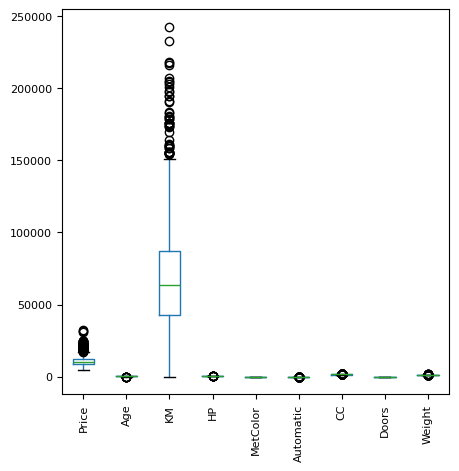

In [ ]:
boxplot = df.boxplot(figsize = (5,5), rot = 90, fontsize = '8', grid = False)

In [ ]:
mean = np.mean(df['KM'])
std = np.std(df['KM'])
print((df['KM']-mean)/std)

0      -0.574695
1       0.117454
2      -0.715386
3      -0.547650
4      -0.801028
          ...   
1431   -1.279939
1432   -1.321120
1433   -1.374036
1434   -1.376703
1435   -1.827849
Name: KM, Length: 1436, dtype: float64


In [ ]:
df['KM-z_score'] = (df['KM']-mean)/std
print(df.head(5))

   Price  Age     KM FuelType  HP  MetColor  Automatic    CC  Doors  Weight  \
0  13500   23  46986   Diesel  90         1          0  2000      3    1165   
1  13750   23  72937   Diesel  90         1          0  2000      3    1165   
2  13950   24  41711   Diesel  90         1          0  2000      3    1165   
3  14950   26  48000   Diesel  90         0          0  2000      3    1165   
4  13750   30  38500   Diesel  90         0          0  2000      3    1170   

   KM-z_score  
0   -0.574695  
1    0.117454  
2   -0.715386  
3   -0.547650  
4   -0.801028  


In [ ]:
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

               Price       Age        KM        HP  MetColor  Automatic  \
Price       1.000000 -0.876590 -0.569960  0.314990  0.108905   0.033081   
Age        -0.876590  1.000000  0.505672 -0.156622 -0.108150   0.031717   
KM         -0.569960  0.505672  1.000000 -0.333538 -0.080503  -0.081854   
HP          0.314990 -0.156622 -0.333538  1.000000  0.058712   0.013144   
MetColor    0.108905 -0.108150 -0.080503  0.058712  1.000000  -0.019335   
Automatic   0.033081  0.031717 -0.081854  0.013144 -0.019335   1.000000   
CC          0.165067 -0.133182  0.302150  0.050884  0.034921  -0.069321   
Doors       0.185326 -0.148359 -0.036197  0.092424  0.085243  -0.027654   
Weight      0.581198 -0.470253 -0.028598  0.089614  0.057929   0.057249   
KM-z_score -0.569960  0.505672  1.000000 -0.333538 -0.080503  -0.081854   

                  CC     Doors    Weight  KM-z_score  
Price       0.165067  0.185326  0.581198   -0.569960  
Age        -0.133182 -0.148359 -0.470253    0.505672  
KM       

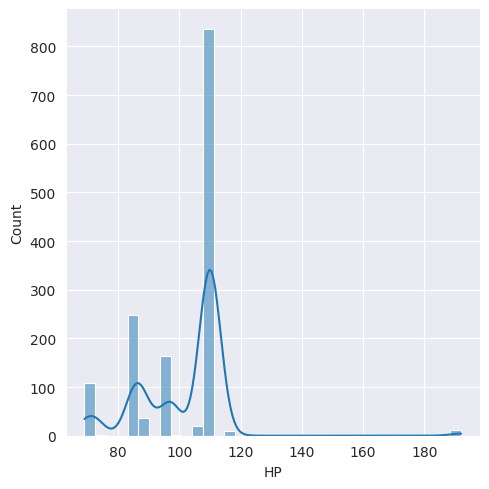

In [ ]:
sns.set_style('darkgrid')
sns.displot(df, x = 'HP', kde = True, fill = True)

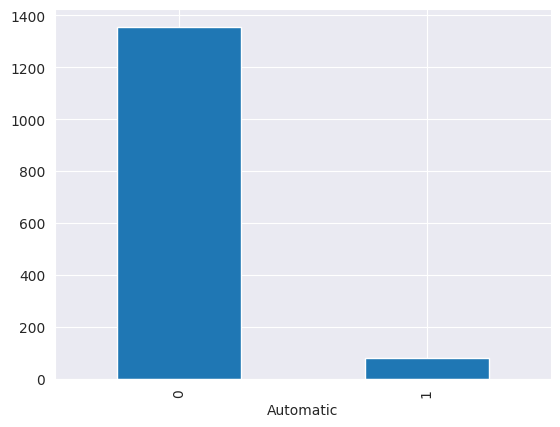

In [ ]:
df['Automatic'].value_counts().plot(kind = 'bar')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 49.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


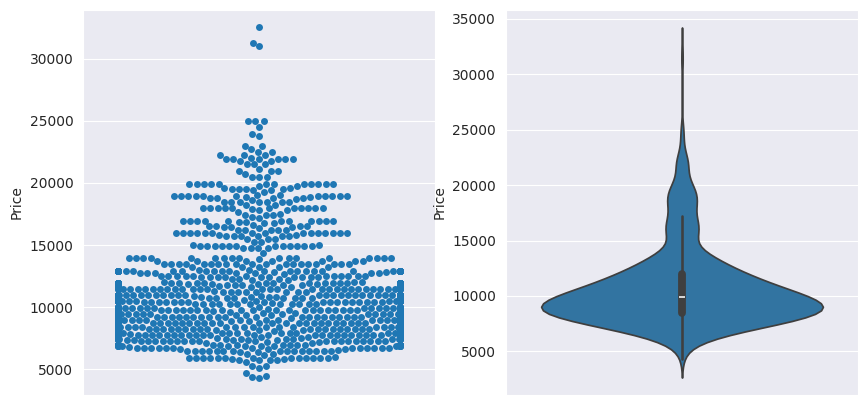

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.swarmplot(df['Price'])
plt.subplot(1,2,2)
sns.violinplot(df['Price'])
plt.show()

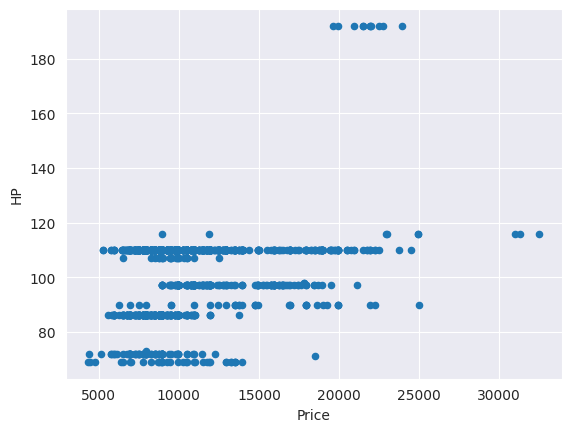

In [ ]:
df.plot('Price','HP',kind = 'scatter')
plt.show()

<ipython-input-26-5a957adeaf3b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Price', y = 'HP', data = df[15:35], palette='plasma')


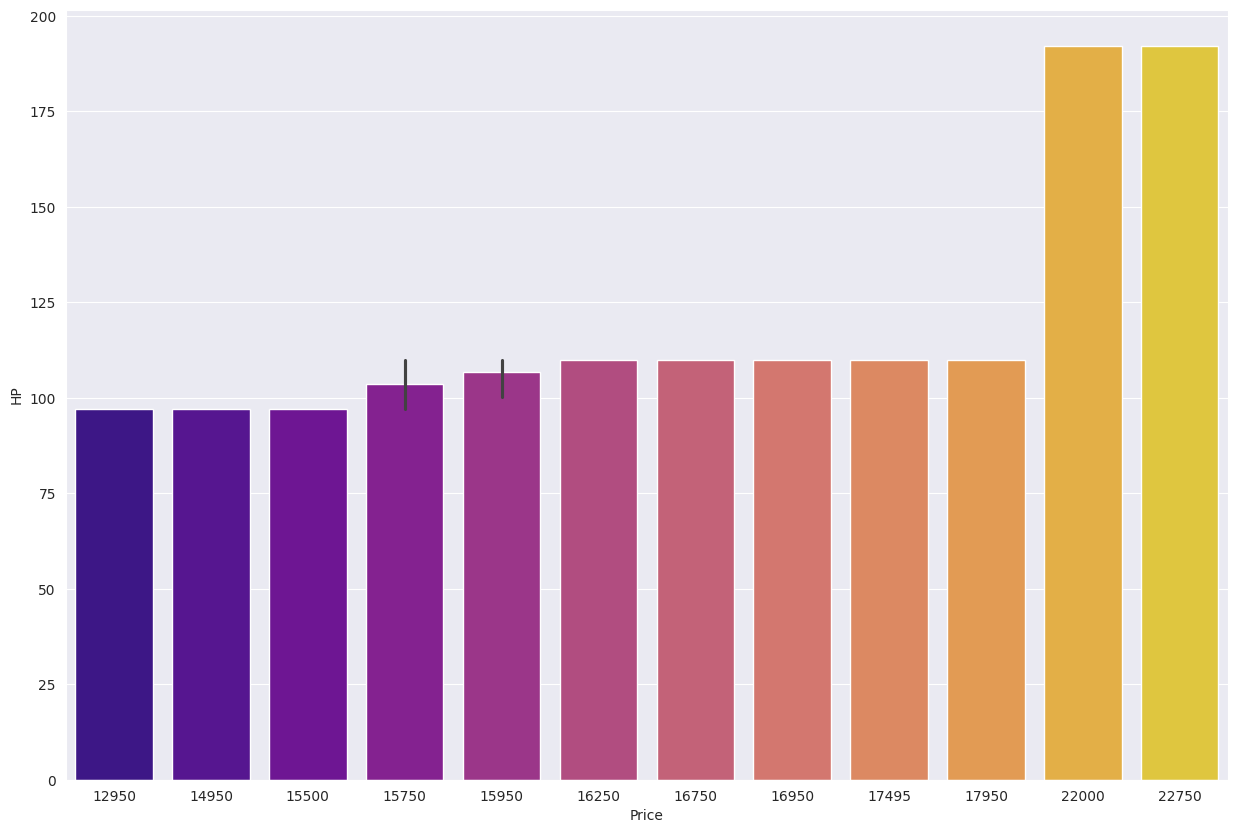

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x = 'Price', y = 'HP', data = df[15:35], palette='plasma')
plt.show()

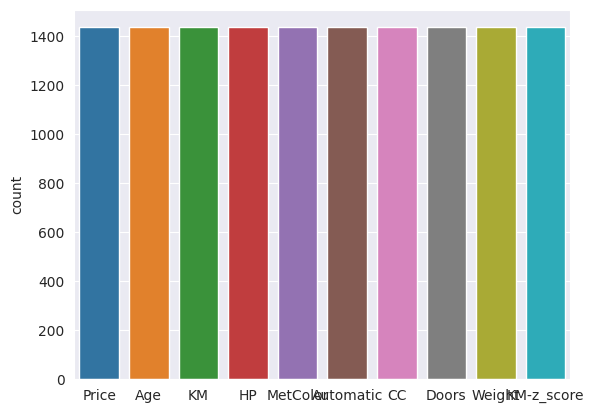

In [ ]:
sns.countplot(df)
plt.show()

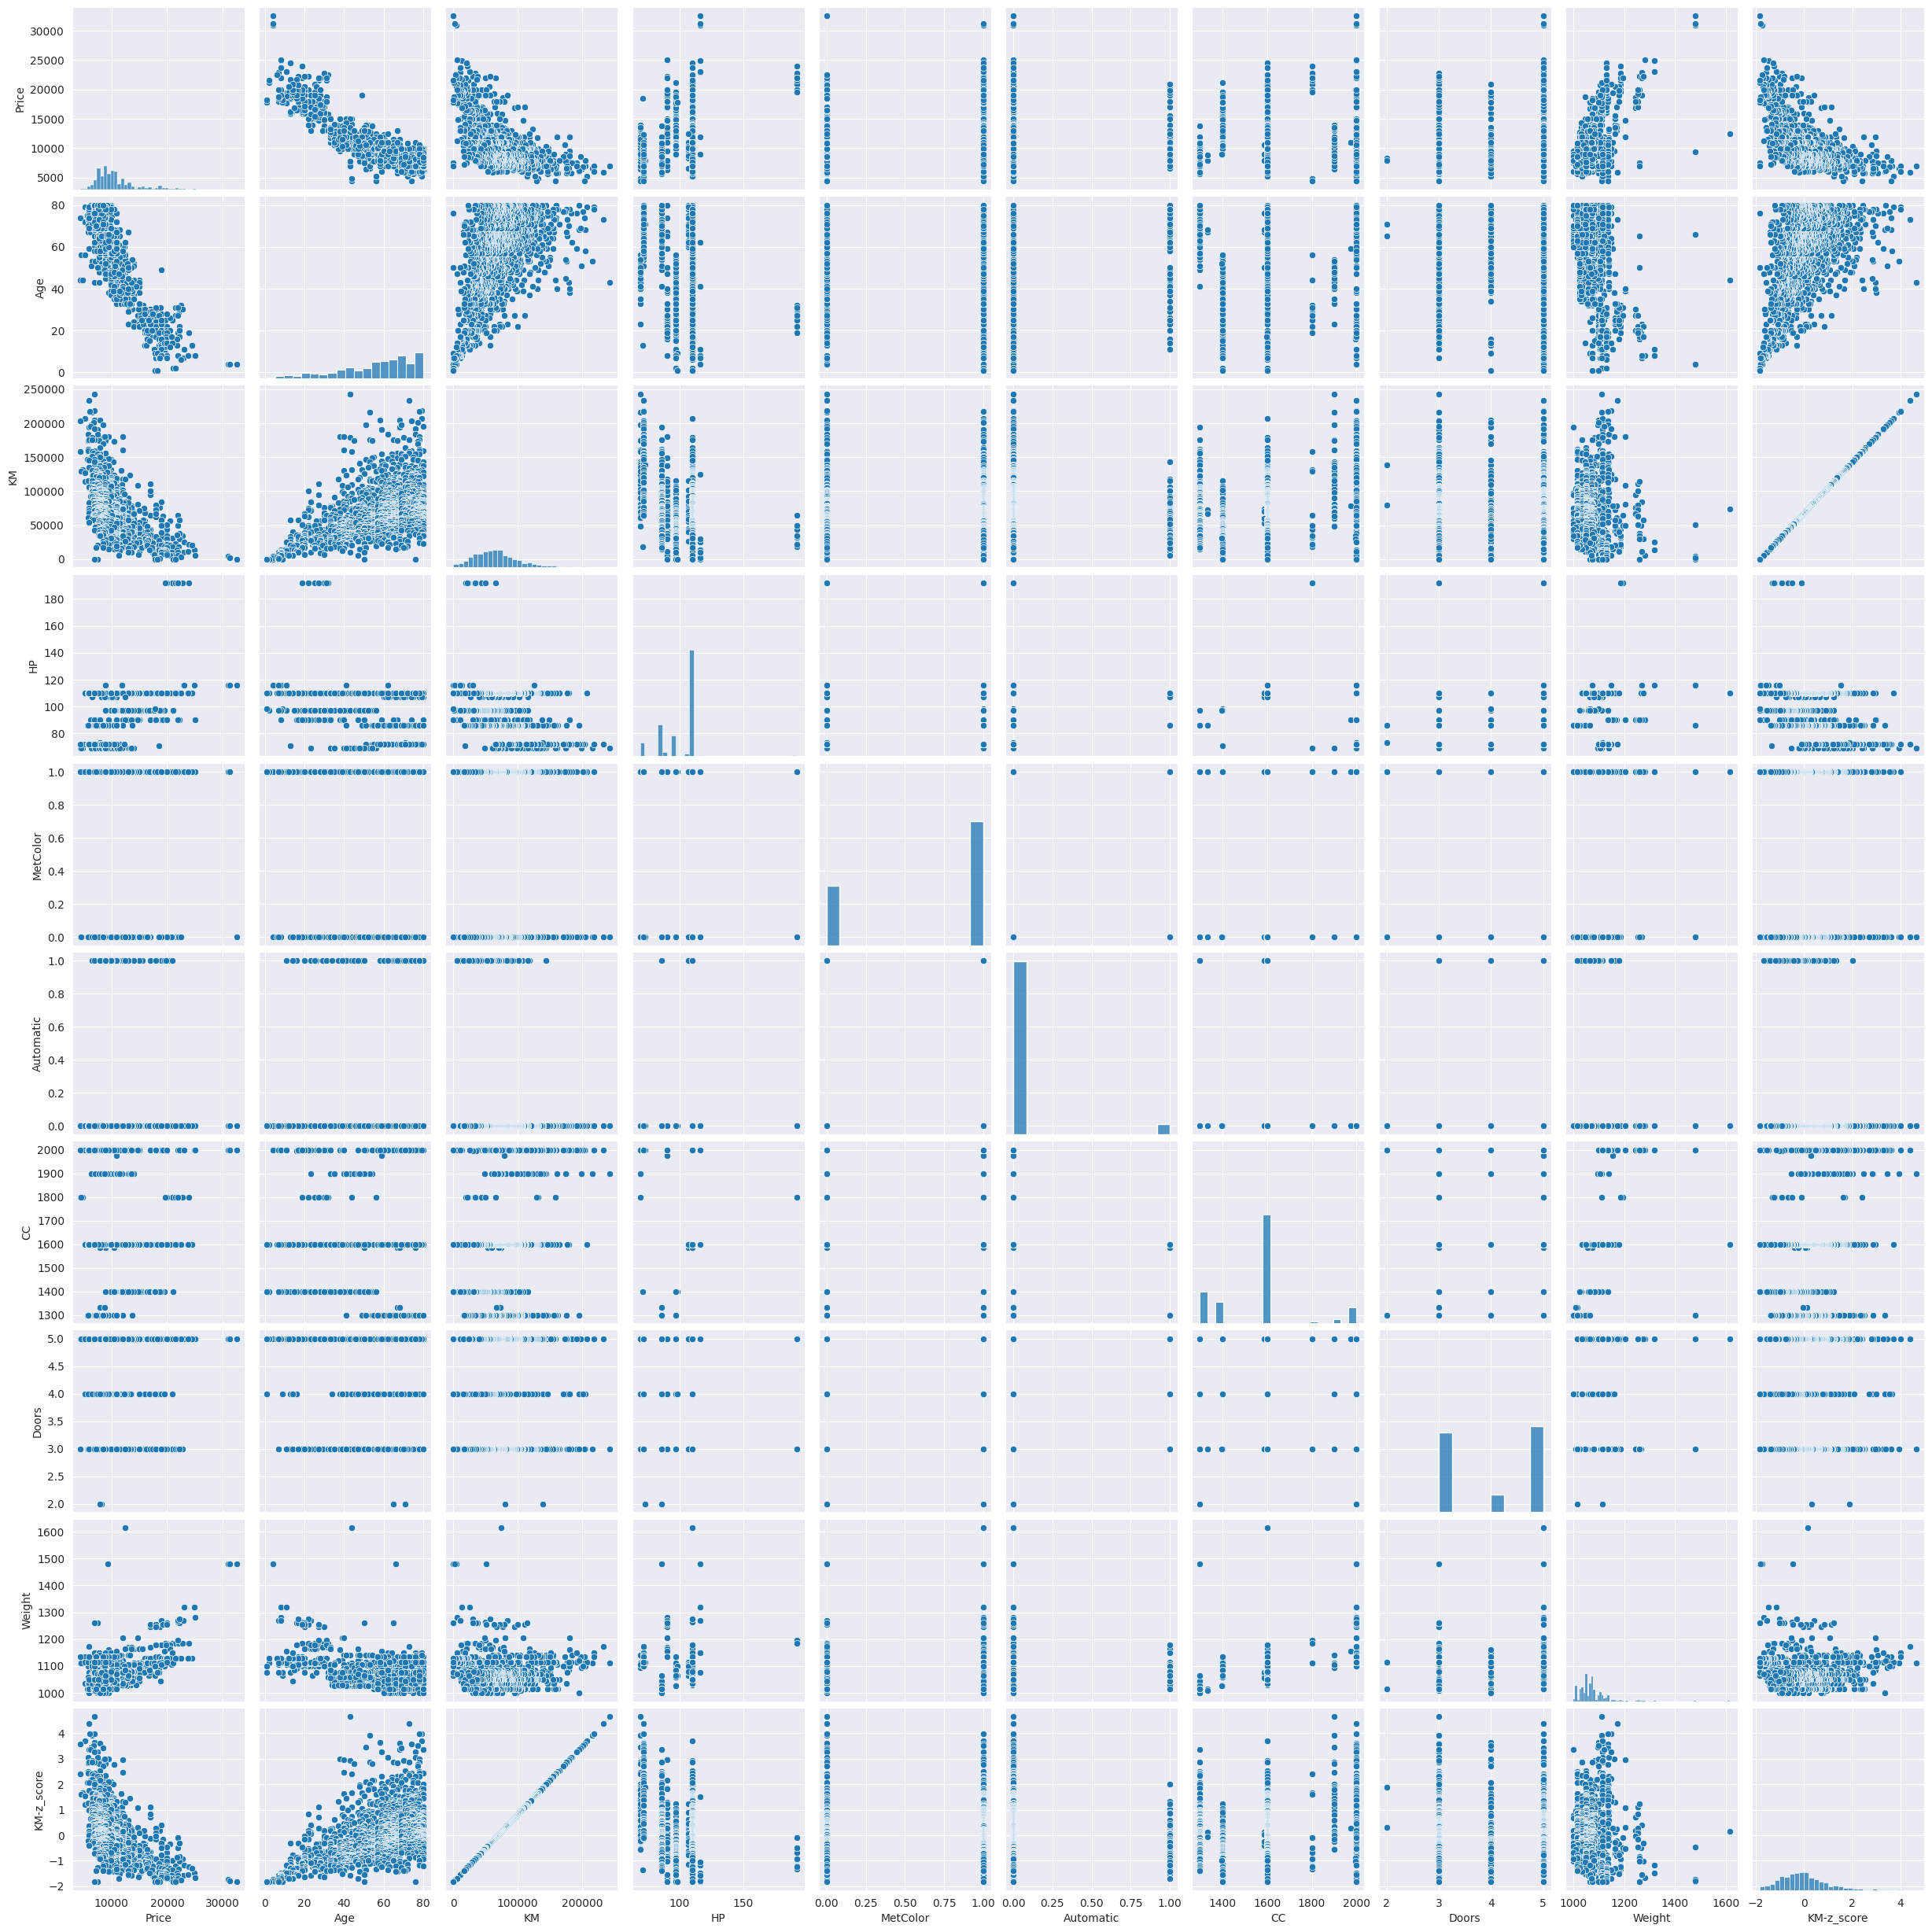

In [ ]:
sns.pairplot(df)
plt.show()